In [42]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True

In [43]:
# Load final molecules with similarity metrics
data = pd.read_csv("~/Downloads/final_hits.csv")

In [44]:
to_format = {
    "chembl": "ChEMBL",
    "train_hits": "Train Hits",
    "asymmetric_mcs": "Asymmetric MCS",
    "symmetric_mcs": "Symmetric MCS",
    "tanimoto": "Tanimoto",
    "tversky": "Tversky",
}

In [57]:
num_mols = len(data)
figures = {}

for reference in ["train_hits", "chembl", "BAB159"]:
    mols = [Chem.MolFromSmiles(smiles) for smiles in data["smiles"]]
    legends = [name.replace("RL-MLP_01", "RL-MLP_01 (synthecin)") for name in data["FINAL_PAPER_ID"]]

    for metric in ["tanimoto", "tversky", "asymmetric_mcs", "symmetric_mcs"]:
        mols += [Chem.MolFromSmiles(smiles) for smiles in data[f"{reference}_{metric}_nearest_neighbor"]]
        legends += [f"{to_format[metric]} = {value:.3f}" for value in data[f"{reference}_{metric}_nearest_neighbor_similarity"]]

    figures[reference] = Draw.MolsToGridImage(
        mols,
        molsPerRow=num_mols,
        subImgSize=(400, 400),
        legends=legends,
        maxMols=len(mols)
    )

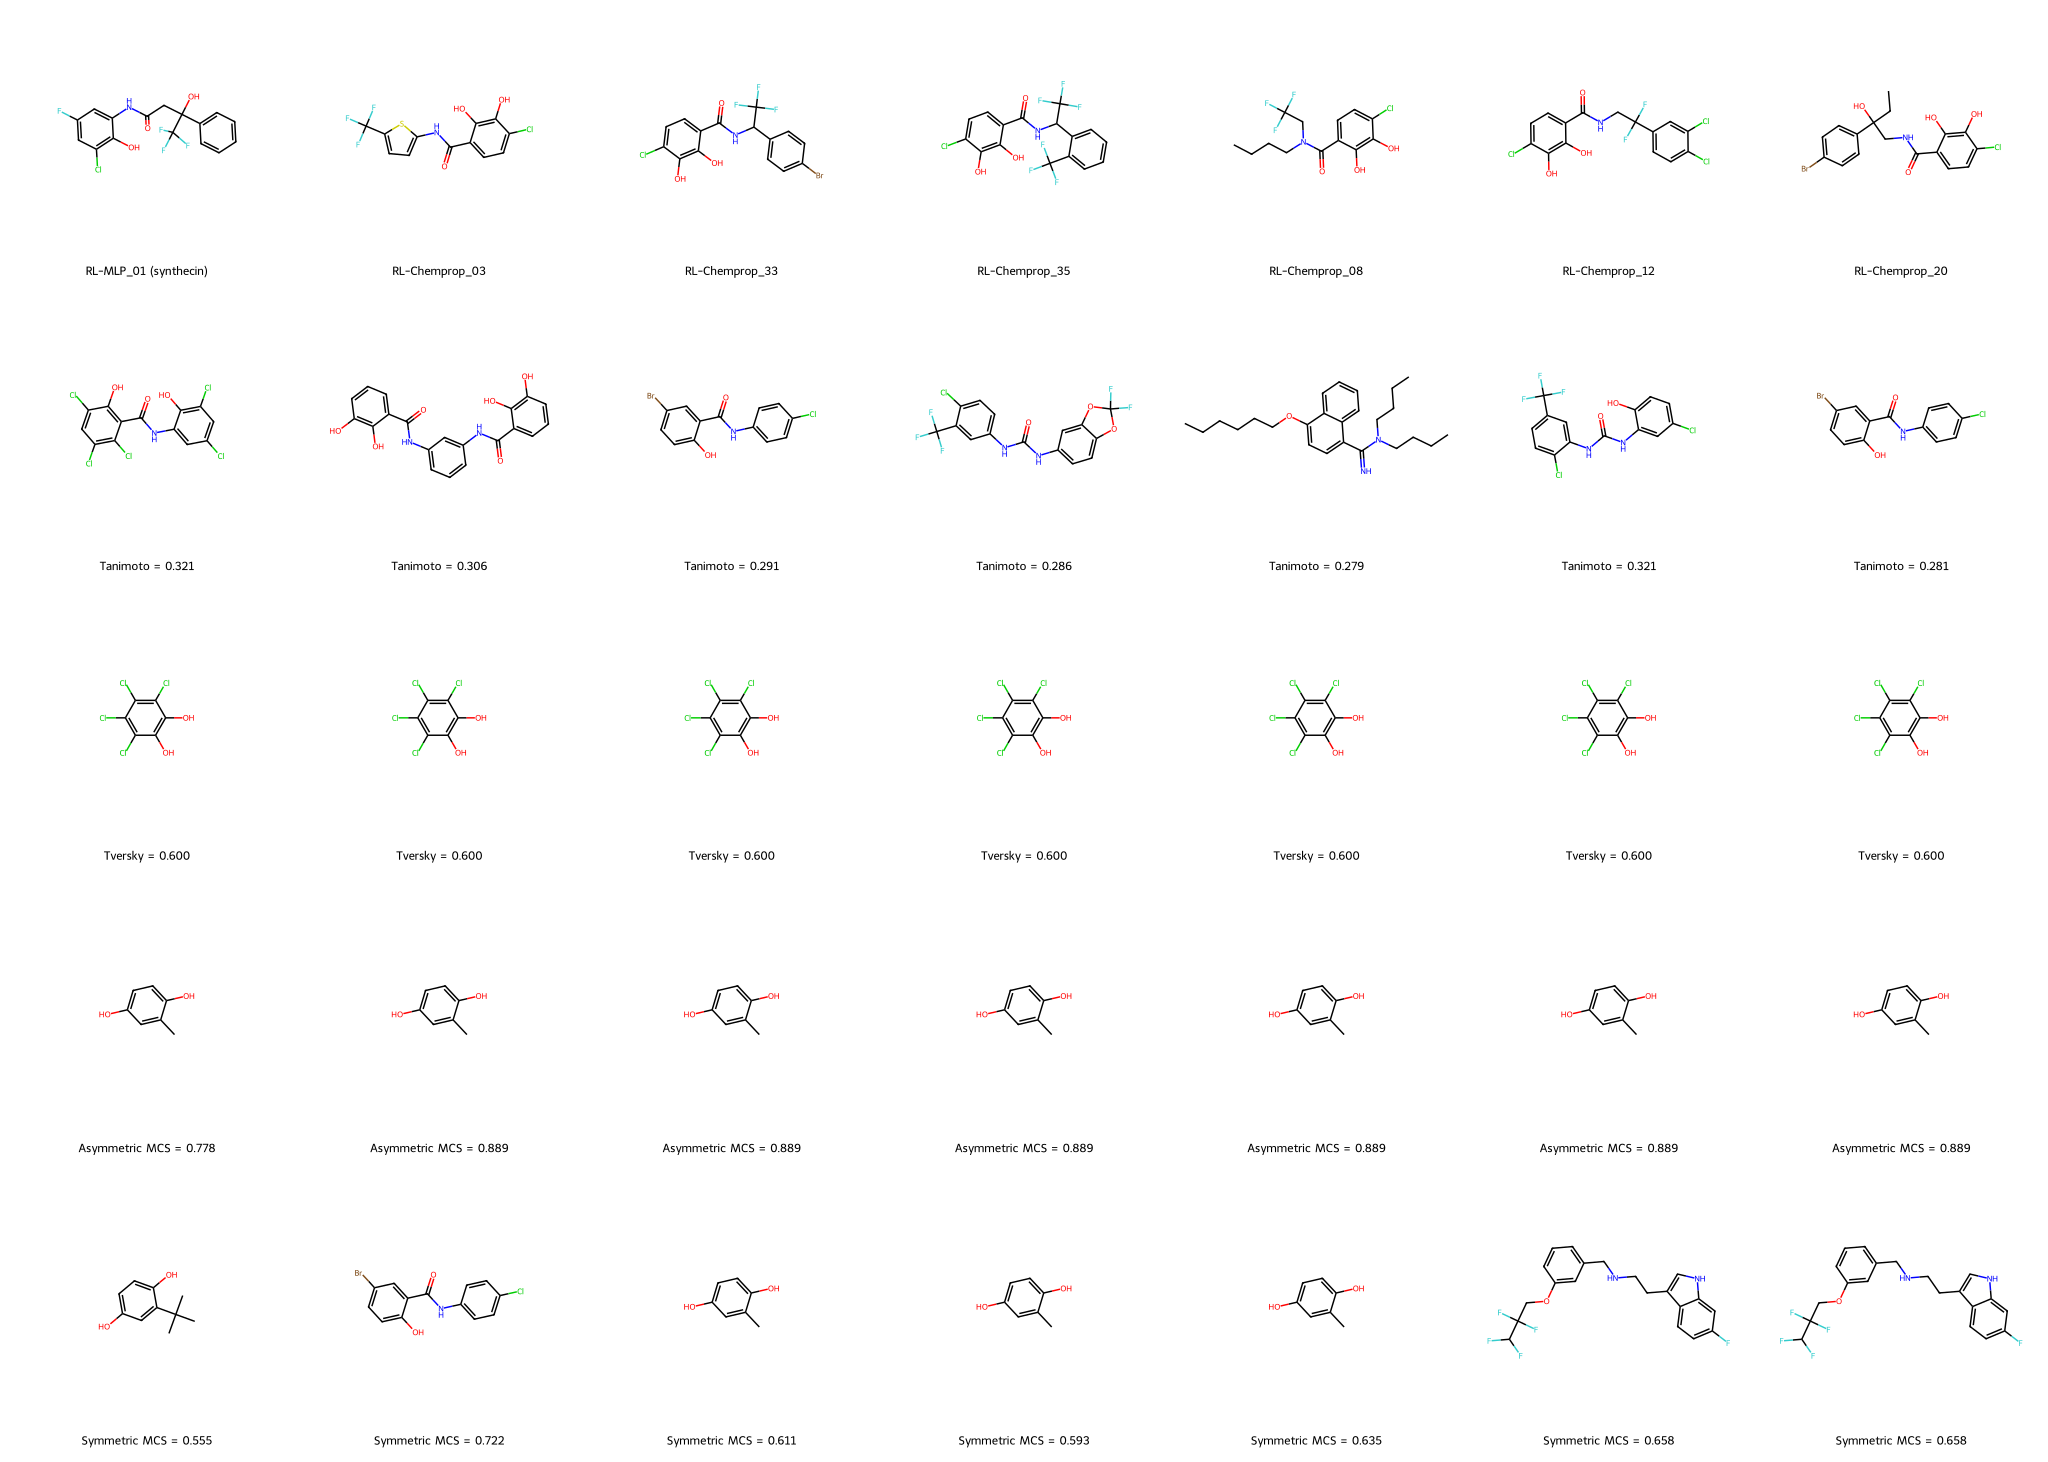

In [58]:
figures["train_hits"]

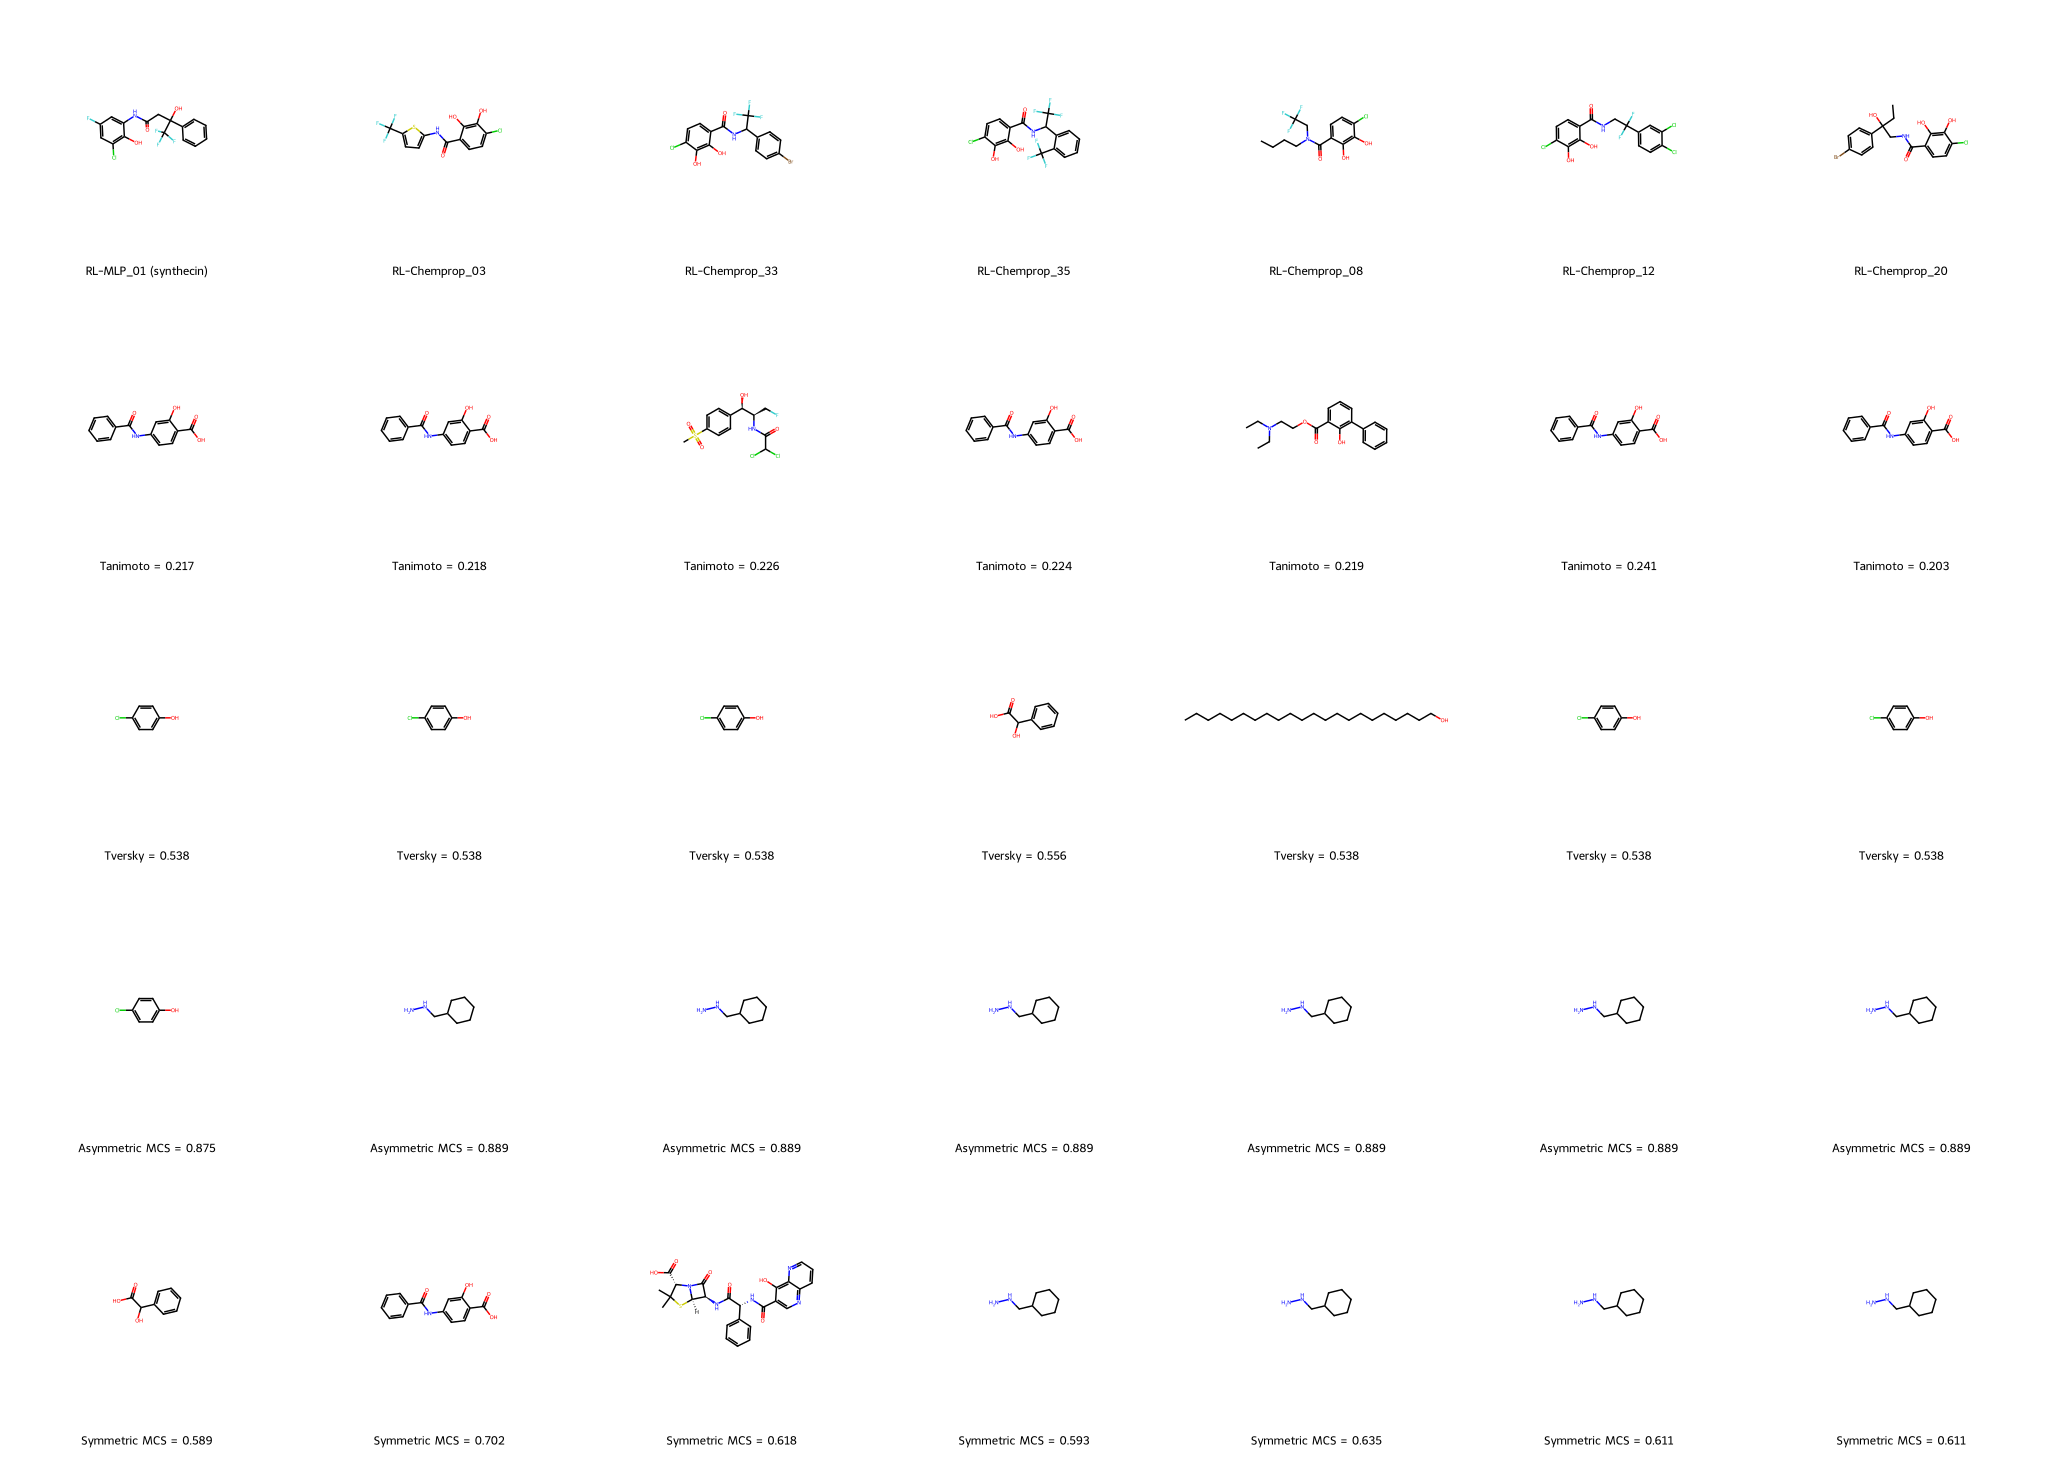

In [59]:
figures["chembl"]

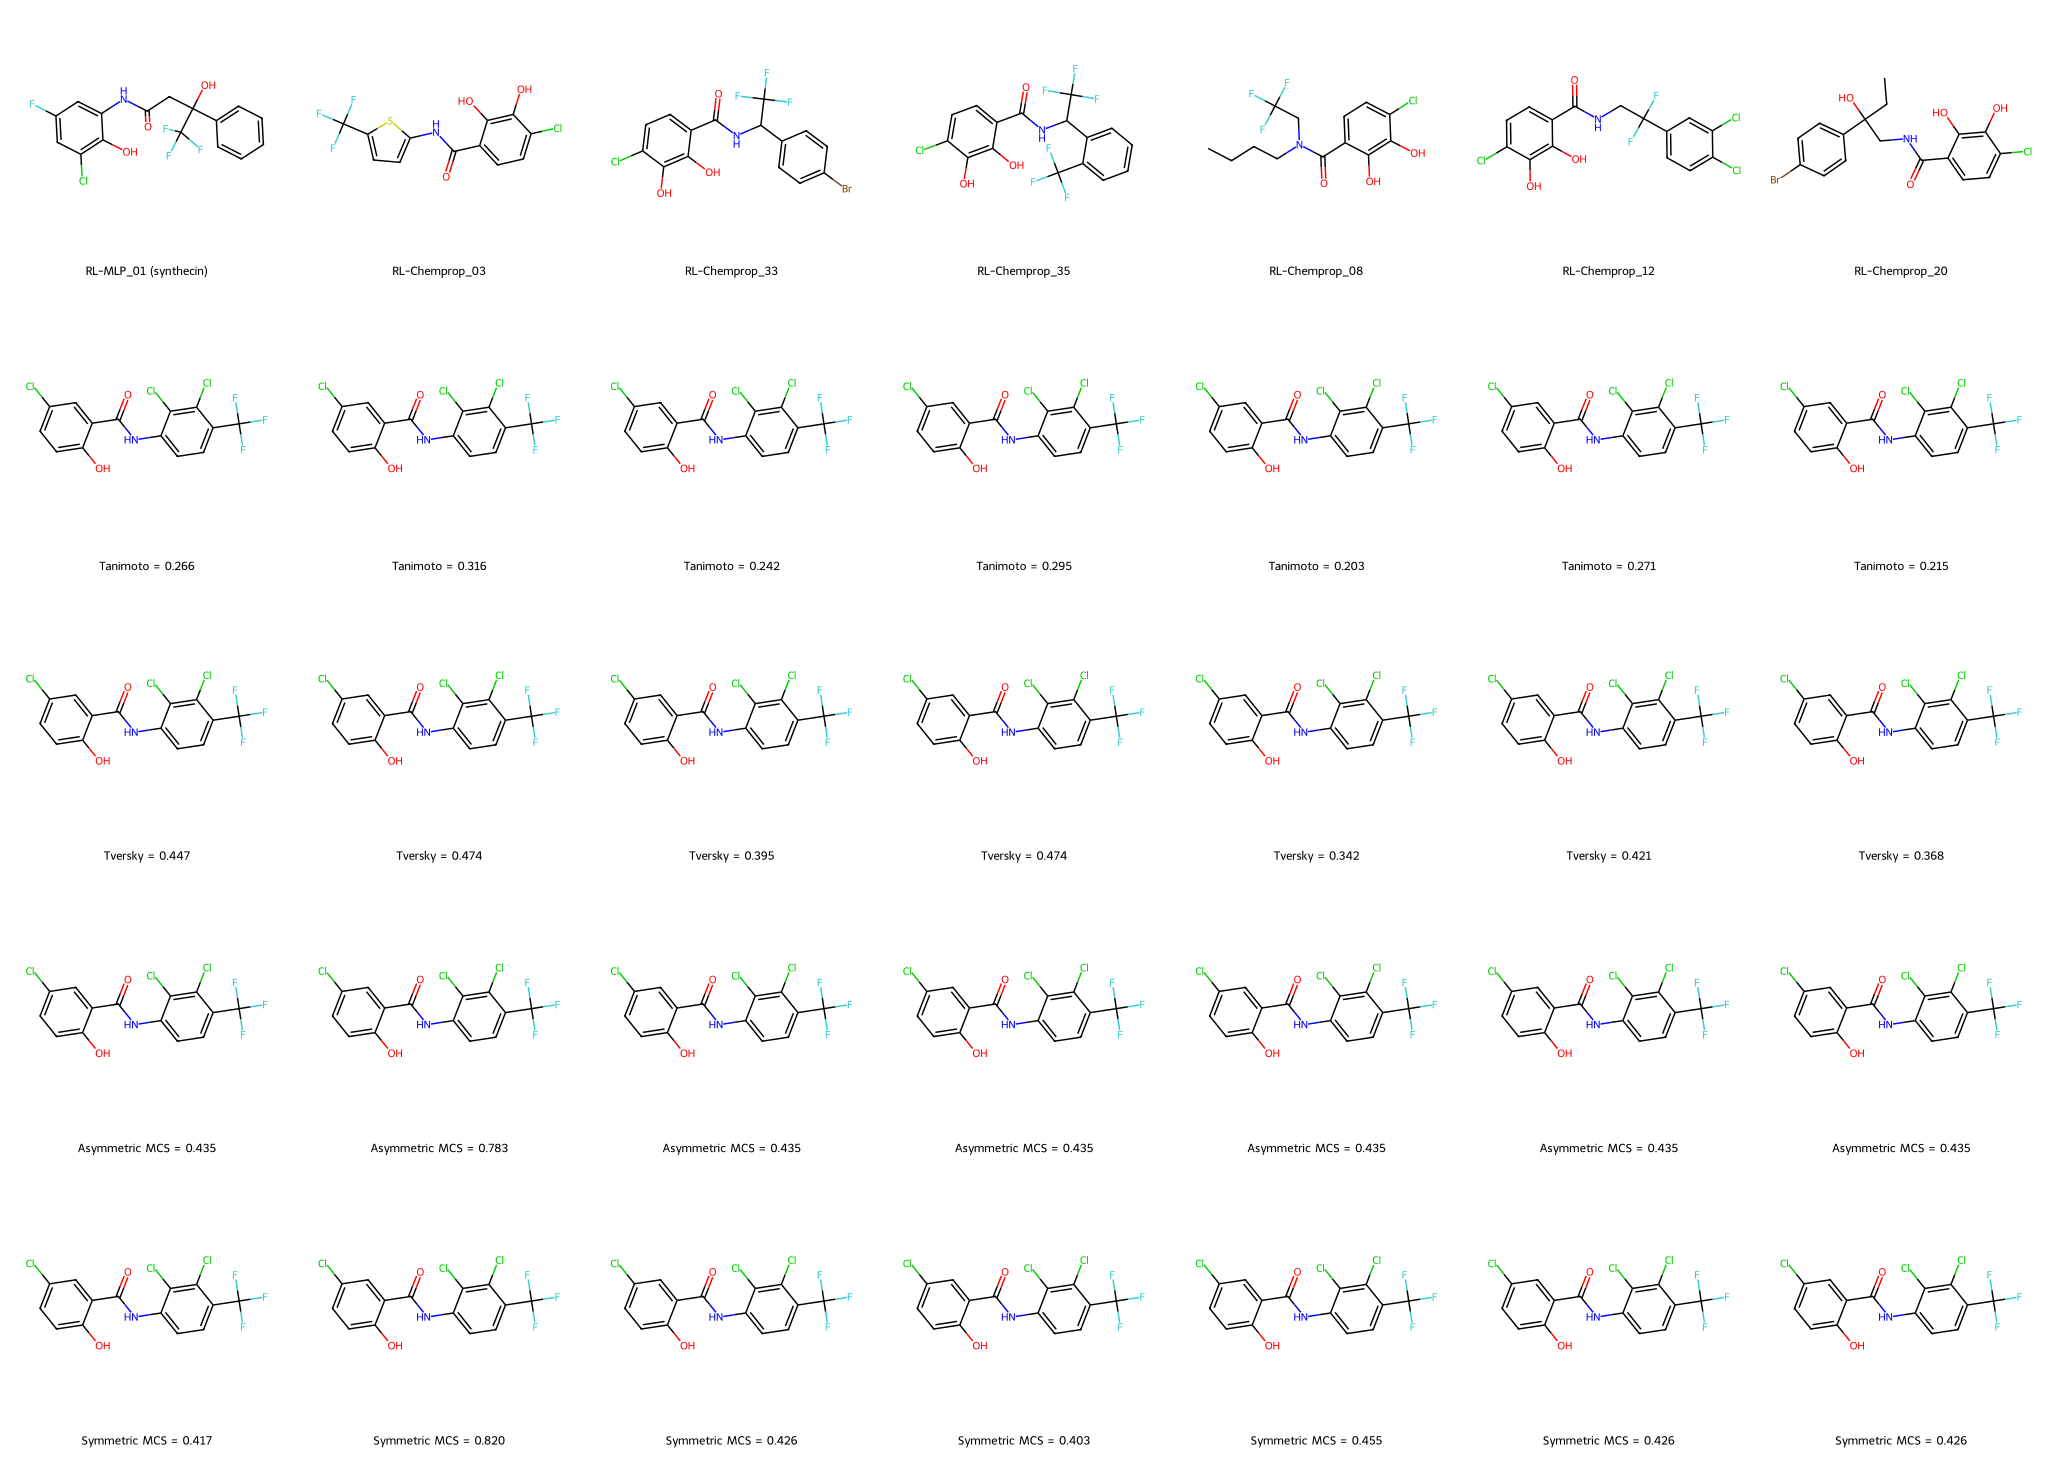

In [60]:
figures["BAB159"]